In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import pickle

In [5]:
def plot_normalized_stacked_bar(df, characteristic, category, bins=5):
    """
    Plots a normalized stacked bar chart for a given characteristic and categorical variable.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - characteristic (str): The column name for the numeric characteristic to bin (e.g., 'relspeed').
    - category (str): The column name for the categorical variable to compare (e.g., 'eventtype').
    - bins (int): The number of bins to divide the characteristic into.
    """
    # Bin the characteristic into categories (you can adjust the number of bins)
    df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)

    # Create a pivot table for the stacked bar chart with normalized values
    stacked_data = df.pivot_table(index=f'{characteristic}_bin', columns=category, aggfunc='size', fill_value=0)

    # Normalize by dividing by the sum across each bin (row-wise normalization)
    stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)

    # Plot the normalized stacked bar chart
    stacked_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Normalized Stacked Bar Chart: {characteristic.capitalize()} Bins vs {category.capitalize()} (Proportions)')
    plt.xlabel(f'{characteristic.capitalize()} Bins')
    plt.ylabel('Proportion of Events')
    plt.legend(title=category.capitalize())
    plt.show()

# Example usage:
# plot_normalized_stacked_bar(df, 'relspeed', 'eventtype', bins=5)

In [6]:
baseball_df = pd.read_pickle("../data/aggregated_data.pkl")

In [7]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,1,4.0,1,0.0,0.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,2,4.0,1,0.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,3,4.0,1,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,1,4.0,1,0.0,0.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,35,1,5.0,0,0.0,0.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717580,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,57,3,7.0,0,0.0,2.0,...,7.676146,17.788908,-1.050967,2.320313,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717581,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,5,7.0,0,2.0,2.0,...,16.145367,12.247181,-0.841397,2.487577,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717582,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,6,7.0,0,2.0,2.0,...,8.844625,2.210124,-0.000184,1.811733,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


In [8]:
rays_df = baseball_df[
    (baseball_df["Home"] == "Tampa Bay Rays") | (baseball_df["Visitor"] == "Tampa Bay Rays")
]
rays_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
1733,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,1,1.0,0,0.0,0.0,...,-9.557374,15.703059,1.321567,2.498743,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1734,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,2,1.0,0,1.0,0.0,...,4.664906,-5.764714,0.139269,2.208911,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1735,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,3,1.0,0,1.0,1.0,...,-5.253972,17.315651,-0.322968,1.875304,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1736,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,4,1.0,0,1.0,2.0,...,-7.574202,3.907278,0.928502,2.325066,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1737,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,2,1,1.0,0,0.0,0.0,...,-2.844523,17.074760,1.153933,3.007829,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717489,2023/09/22/tormlb-tbamlb-1,2023-09-22 22:40:00,2023-09-22,22:40:00,47,1,6.0,1,0.0,0.0,...,16.053858,10.556245,-0.302618,3.474776,139,Tampa Bay Rays,141,Toronto Blue Jays,12,Tropicana Field
717490,2023/09/22/tormlb-tbamlb-1,2023-09-22 22:40:00,2023-09-22,22:40:00,51,2,7.0,0,0.0,1.0,...,-23.739397,11.804228,0.774820,3.089413,139,Tampa Bay Rays,141,Toronto Blue Jays,12,Tropicana Field
717505,2023/09/21/anamlb-tbamlb-1,2023-09-21 17:10:00,2023-09-21,17:10:00,63,2,8.0,0,0.0,1.0,...,1.882045,20.100876,0.599463,2.293482,139,Tampa Bay Rays,108,Los Angeles Angels,12,Tropicana Field
717506,2023/09/21/anamlb-tbamlb-1,2023-09-21 17:10:00,2023-09-21,17:10:00,65,1,8.0,0,0.0,0.0,...,1.733773,20.947205,-0.485144,2.967994,139,Tampa Bay Rays,108,Los Angeles Angels,12,Tropicana Field


In [9]:
red_sox = baseball_df[
    (baseball_df["Home"] == "Philadelphia Phillies") | (baseball_df["Visitor"] == "Philadelphia Phillies")
]

red_sox = red_sox[red_sox["strikes"] == 2]
red_sox

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
2262,2021/04/30/nynmlb-phimlb-1,2021-04-30 19:05:00,2021-04-30,19:05:00,1,3,1.0,0,0.0,2.0,...,21.427376,16.768854,-0.795394,1.485821,143,Philadelphia Phillies,121,New York Mets,2681,Citizens Bank Park
2263,2021/04/30/nynmlb-phimlb-1,2021-04-30 19:05:00,2021-04-30,19:05:00,1,4,1.0,0,1.0,2.0,...,23.015018,16.904686,-0.859060,2.052820,143,Philadelphia Phillies,121,New York Mets,2681,Citizens Bank Park
2264,2021/04/30/nynmlb-phimlb-1,2021-04-30 19:05:00,2021-04-30,19:05:00,1,5,1.0,0,2.0,2.0,...,18.999531,16.835939,-0.955448,2.240943,143,Philadelphia Phillies,121,New York Mets,2681,Citizens Bank Park
2265,2021/04/30/nynmlb-phimlb-1,2021-04-30 19:05:00,2021-04-30,19:05:00,1,6,1.0,0,2.0,2.0,...,9.273830,16.442865,-0.696559,3.325766,143,Philadelphia Phillies,121,New York Mets,2681,Citizens Bank Park
2266,2021/04/30/nynmlb-phimlb-1,2021-04-30 19:05:00,2021-04-30,19:05:00,1,7,1.0,0,2.0,2.0,...,8.906669,18.357540,-0.738724,2.418561,143,Philadelphia Phillies,121,New York Mets,2681,Citizens Bank Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717379,2023/09/30/phimlb-nynmlb-2,2023-09-30 20:15:00,2023-09-30,20:15:00,55,5,5.0,1,1.0,2.0,...,-17.453129,-2.491296,1.869450,0.536806,121,New York Mets,143,Philadelphia Phillies,3289,Citi Field
717380,2023/09/30/phimlb-nynmlb-2,2023-09-30 20:15:00,2023-09-30,20:15:00,55,6,5.0,1,2.0,2.0,...,-10.891305,-1.812137,0.233897,2.727215,121,New York Mets,143,Philadelphia Phillies,3289,Citi Field
717423,2023/09/27/pitmlb-phimlb-1,2023-09-27 22:40:00,2023-09-27,22:40:00,70,3,8.0,0,0.0,2.0,...,-4.995191,-0.886336,-0.224883,2.464741,143,Philadelphia Phillies,134,Pittsburgh Pirates,2681,Citizens Bank Park
717524,2023/09/20/phimlb-atlmlb-1,2023-09-20 16:20:00,2023-09-20,16:20:00,55,6,7.0,1,1.0,2.0,...,-11.636448,13.065950,-0.428276,3.058526,144,Atlanta Braves,143,Philadelphia Phillies,4705,Truist Park


In [10]:
# Apply the categorization to the DataFrame
# rays_df = rays_df[(rays_df["strikes"] == 2) & ((rays_df["balls"] == 0))].copy()
rays_df = rays_df[(rays_df["strikes"] == 2)]
rays_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
1736,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,4,1.0,0,1.0,2.0,...,-7.574202,3.907278,0.928502,2.325066,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1740,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,2,4,1.0,0,1.0,2.0,...,-2.586195,16.127565,0.954523,4.283906,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1743,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,3,3,1.0,0,0.0,2.0,...,-3.503625,17.805056,0.646787,3.914034,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1744,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,3,4,1.0,0,1.0,2.0,...,14.498672,2.617330,-0.640853,0.542169,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1745,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,3,5,1.0,0,2.0,2.0,...,14.382199,-1.313962,0.601888,2.030456,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717354,2023/09/29/tbamlb-tormlb-1,2023-09-29 23:07:00,2023-09-29,23:07:00,52,5,6.0,0,1.0,2.0,...,-4.819575,-1.417158,0.938706,1.956515,141,Toronto Blue Jays,139,Tampa Bay Rays,14,Rogers Centre
717405,2023/09/29/tbamlb-tormlb-1,2023-09-29 23:07:00,2023-09-29,23:07:00,54,3,6.0,0,0.0,2.0,...,-3.367182,-1.451041,1.150962,0.529293,141,Toronto Blue Jays,139,Tampa Bay Rays,14,Rogers Centre
717409,2023/09/29/tbamlb-tormlb-1,2023-09-29 23:07:00,2023-09-29,23:07:00,55,3,6.0,0,0.0,2.0,...,-3.516656,-3.866746,1.907140,1.059673,141,Toronto Blue Jays,139,Tampa Bay Rays,14,Rogers Centre
717465,2023/09/23/tormlb-tbamlb-1,2023-09-23 20:10:00,2023-09-23,20:10:00,33,6,4.0,0,2.0,2.0,...,11.529491,3.058636,0.096877,2.157572,139,Tampa Bay Rays,141,Toronto Blue Jays,12,Tropicana Field


In [11]:
baseball_df = baseball_df[(baseball_df["strikes"] == 2)]
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
7,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,4,4.0,1,1.0,2.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
10,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,33,3,4.0,1,0.0,2.0,...,-0.019169,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field
17,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,6,2.0,0,2.0,2.0,...,5.329813,15.719269,0.497709,0.654149,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
23,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,5,2.0,0,1.0,2.0,...,15.600348,10.791145,-0.211373,1.022123,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
24,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,16,4,2.0,1,1.0,2.0,...,-6.668416,-10.243636,0.270777,-1.181013,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717580,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,57,3,7.0,0,0.0,2.0,...,7.676146,17.788908,-1.050967,2.320313,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717581,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,5,7.0,0,2.0,2.0,...,16.145367,12.247181,-0.841397,2.487577,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717582,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,6,7.0,0,2.0,2.0,...,8.844625,2.210124,-0.000184,1.811733,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


## Trying to see how the rays compare to the league average in terms of 2-strike count outcomes

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_70969/3053249920.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rays_df['event_category'] = rays_df['eventtype'].apply(categorize_event)
/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_70969/3053249920.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball_df['event_category'] = baseball_df['eventtype'].apply(categorize_event)


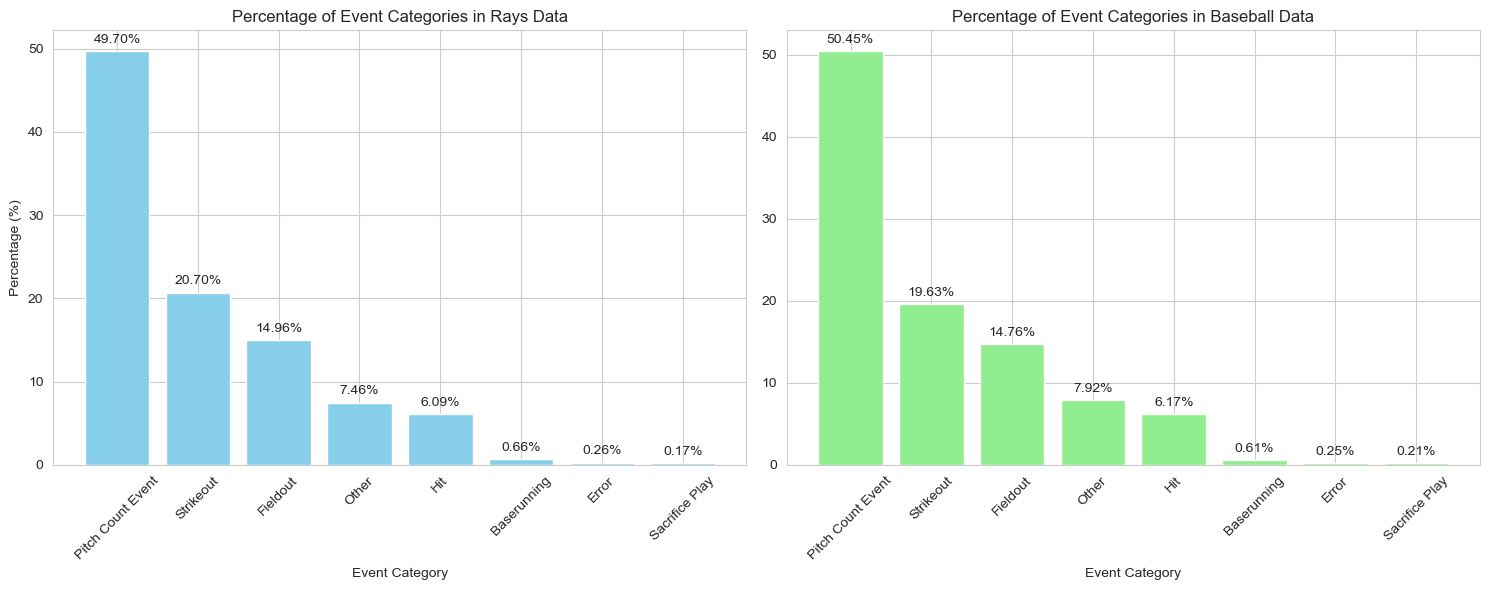

In [12]:

# Define the categories
# Define the new categories based on the suggestions
strikeout_events = ["strikeout", "strikeout_double_play"]

fieldout_events = [
    "field_out", "grounded_into_double_play", "force_out", "fielders_choice_out", 
    "fielders_choice", "double_play"
]

sacrifice_plays = ["sac_fly", "sac_bunt", "sac_fly_double_play"]

hits = ["single", "double", "triple", "homerun"]

pitch_count_events = [
    "ball", "called_strike", "foul", "swinging_strike", "swinging_strike_blocked", 
    "pitchout", "missed_bunt"
]

baserunning_events = [
    "stolen_base_2b", "stolen_base_3b", "stolen_base_home", "caught_stealing_2b", 
    "caught_stealing_3b", "caught_stealing_home", "wild_pitch", "passed_ball", 
    "defensive_indiff", "pickoff_caught_stealing_2b", "other_advance"
]

errors = ["field_error", "catcher_interf"]

# Function to categorize each event
def categorize_event(event):
    if event in strikeout_events:
        return 'Strikeout'
    elif event in fieldout_events:
        return 'Fieldout'
    elif event in sacrifice_plays:
        return 'Sacrifice Play'
    elif event in hits:
        return 'Hit'
    elif event in pitch_count_events:
        return 'Pitch Count Event'
    elif event in baserunning_events:
        return 'Baserunning'
    elif event in errors:
        return 'Error'
    else:
        return 'Other'

# Apply the categorization to the DataFrame
rays_df['event_category'] = rays_df['eventtype'].apply(categorize_event)
red_sox['event_category'] = red_sox['eventtype'].apply(categorize_event)
baseball_df['event_category'] = baseball_df['eventtype'].apply(categorize_event)

# Calculate percentages for each category in rays_df
rays_event_counts = rays_df['event_category'].value_counts(normalize=True) * 100

# Calculate percentages for each category in baseball_df
baseball_event_counts = baseball_df['event_category'].value_counts(normalize=True) * 100

# Calculate percentages for each category in red_sox
red_sox_event_counts = red_sox['event_category'].value_counts(normalize=True) * 100


# Plotting the comparison
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Rays data plot
ax[0].bar(rays_event_counts.index, rays_event_counts.values, color='skyblue')
ax[0].set_xlabel('Event Category')
ax[0].set_ylabel('Percentage (%)')
ax[0].set_title('Percentage of Event Categories in Rays Data')
ax[0].tick_params(axis='x', rotation=45)

# Adding percentages as text labels for Rays data
for i, value in enumerate(rays_event_counts.values):
    ax[0].text(i, value + 1, f'{value:.2f}%', ha='center')
     
    
# Baseball data plot
ax[1].bar(baseball_event_counts.index, baseball_event_counts.values, color='lightgreen')
ax[1].set_xlabel('Event Category')
ax[1].set_title('Percentage of Event Categories in Baseball Data')
ax[1].tick_params(axis='x', rotation=45)

# Adding percentages as text labels for Baseball data
for i, value in enumerate(baseball_event_counts.values):
    ax[1].text(i, value + 1, f'{value:.2f}%', ha='center')
    
# # Other team's data plot
# ax[2].bar(red_sox_event_counts.index, red_sox_event_counts.values, color='skyblue')
# ax[2].set_xlabel('Event Category')
# ax[2].set_ylabel('Percentage (%)')
# ax[2].set_title('Percentage of Event Categories in Other Team Data')
# ax[2].tick_params(axis='x', rotation=45)
# 
# # Adding percentages as text labels for other team's data
# for i, value in enumerate(red_sox_event_counts.values):
#     ax[2].text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.tight_layout()
plt.show()

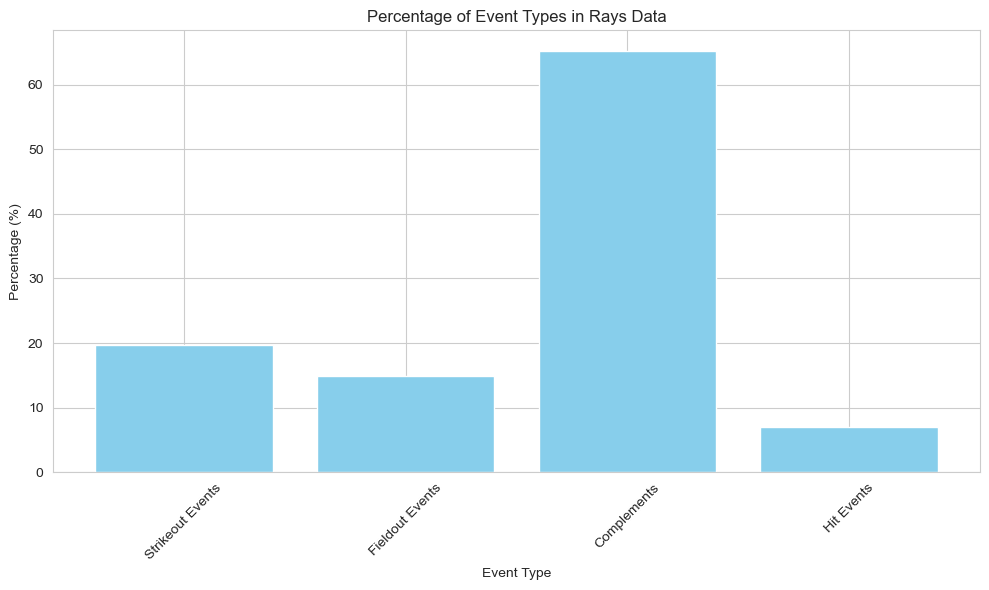

In [13]:
# import pandas as pd
import matplotlib.pyplot as plt

# Define the categories
strikeout_events = ["strikeout", "strikeout_double_play"]

fieldout_events = ["field_out", "grounded_into_double_play", "force_out", 
                   "fielders_choice_out", "fielders_choice", "double_play", 
                   "sac_fly", "sac_bunt", "sac_fly_double_play", "triple_play"]

complements = ["ball", "single", "blocked_ball", "foul", "walk", "force_out", 
               "wild_pitch", "stolen_base_2b", "homerun", "hit_by_pitch", 
               "double", "triple", "field_error", "stolen_base_3b", 
               "passed_ball", "caught_stealing_2b", "defensive_indiff", 
               "caught_stealing_3b", "pitchout", "swinging_strike_blocked", 
               "swinging_strike", "pickoff_caught_stealing_2b", "missed_bunt", 
               "caught_stealing_home", "other_advance", "called_strike", 
               "stolen_base_home", "catcher_interf"]

hit = ["single", "homerun", "double", "triple", "home_run"]

# Count the occurrences of each event type in the 'eventtype' column
total_events = len(baseball_df)
strikeout_count = baseball_df[baseball_df['eventtype'].isin(strikeout_events)].shape[0]
fieldout_count = baseball_df[baseball_df['eventtype'].isin(fieldout_events)].shape[0]
complements_count = baseball_df[baseball_df['eventtype'].isin(complements)].shape[0]
hit_count =  baseball_df[baseball_df['eventtype'].isin(hit)].shape[0]

# Calculate the percentages
strikeout_percentage = (strikeout_count / total_events) * 100
fieldout_percentage = (fieldout_count / total_events) * 100
complements_percentage = (complements_count / total_events) * 100
hit_percentage = (hit_count / total_events) * 100

# Create a dictionary for easy plotting
percentages = {
    'Strikeout Events': strikeout_percentage,
    'Fieldout Events': fieldout_percentage,
    'Complements': complements_percentage,
    'Hit Events': hit_percentage
}

# Plotting the percentages using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(percentages.keys(), percentages.values(), color='skyblue')
plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Event Types in Rays Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
baseball_df['pitcher'].value_counts()

pitcher
Cole, Gerrit          3148
Cease, Dylan          2972
Nola, Aaron           2877
Castillo, Luis        2864
Gausman, Kevin        2828
                      ... 
Wisely, Brett            1
Arcia, Orlando           1
Dickerson, Corey         1
Palacios, Jermaine       1
Perez, Hector            1
Name: count, Length: 1350, dtype: int64

In [15]:
baseball_df.columns

Index(['gameid', 'GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name',
       'event_category'],
      dtype='object')

## Defining High Pressure (for batters) in our scenario as the count containing 2 strikes 

In [16]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & 
                               (baseball_df['balls'].isin([0, 1])) & 
                               (baseball_df['pitcherthrows'] == 'R')].copy()

In [17]:
high_pressure_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category
7,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,4,4.0,1,1.0,2.0,...,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field,Strikeout
10,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,33,3,4.0,1,0.0,2.0,...,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field,Fieldout
23,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,5,2.0,0,1.0,2.0,...,10.791145,-0.211373,1.022123,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,Pitch Count Event
24,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,16,4,2.0,1,1.0,2.0,...,-10.243636,0.270777,-1.181013,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,Pitch Count Event
29,2021/04/21/pitmlb-detmlb-2,2021-04-21 17:40:00,2021-04-21,17:40:00,45,4,6.0,1,1.0,2.0,...,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717549,2023/08/30/atlmlb-colmlb-1,2023-08-31 00:40:00,2023-08-31,00:40:00,37,3,5.0,1,0.0,2.0,...,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field,Fieldout
717572,2023/08/30/arimlb-lanmlb-1,2023-08-31 02:10:00,2023-08-31,02:10:00,34,5,4.0,1,1.0,2.0,...,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium,Hit
717575,2023/09/02/pitmlb-slnmlb-1,2023-09-02 23:15:00,2023-09-02,23:15:00,54,4,7.0,0,1.0,2.0,...,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium,Pitch Count Event
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park,Pitch Count Event


In [18]:
high_pressure_df["eventtype"].unique()

array(['strikeout', 'field_out', 'ball', 'double', 'foul', 'single',
       'blocked_ball', 'wild_pitch', 'grounded_into_double_play',
       'passed_ball', 'force_out', 'sac_fly', 'home_run', 'field_error',
       'hit_by_pitch', 'stolen_base_2b', 'strikeout_double_play',
       'fielders_choice', 'fielders_choice_out', 'double_play', 'triple',
       'sac_bunt', 'caught_stealing_2b', 'defensive_indiff',
       'stolen_base_3b', 'swinging_strike_blocked', 'catcher_interf',
       'pitchout', 'swinging_strike', 'pickoff_caught_stealing_2b',
       'caught_stealing_home', 'other_advance', 'missed_bunt',
       'stolen_base_home', 'called_strike', 'pickoff_attempt_1b',
       'sac_fly_double_play', 'pickoff_1b', 'pickoff_attempt_2b',
       'pickoff_attempt_3b', 'pickoff_3b', 'caught_stealing_3b',
       'triple_play', 'balk', 'pickoff_2b'], dtype=object)

## Redoing the eventtype column to reflect our groupings

In [19]:
# Define the lists
strikeout_events = ["strikeout", "strikeout_double_play"]
fieldout_events = ["field_out", "grounded_into_double_play", "force_out", 
                   "fielders_choice_out", "fielders_choice", "double_play", 
                   "sac_fly", "sac_bunt", "sac_fly_double_play", "triple_play"]
complements = ["ball", "single", "blocked_ball", "foul", "walk", "force_out", 
               "wild_pitch", "stolen_base_2b", "homerun", "hit_by_pitch", 
               "double", "triple", "field_error", "stolen_base_3b", 
               "passed_ball", "caught_stealing_2b", "defensive_indiff", 
               "caught_stealing_3b", "pitchout", "swinging_strike_blocked", 
               "swinging_strike", "pickoff_caught_stealing_2b", "missed_bunt", 
               "caught_stealing_home", "other_advance", "called_strike", 
               "stolen_base_home", "catcher_interf"]
hit = ["single", "homerun", "double", "triple", "home_run", ]

# Create a mapping dictionary
mapping = {}

# Map the events to their respective categories
for event in strikeout_events:
    mapping[event] = "strikeout"

for event in fieldout_events:
    mapping[event] = "fieldout"

for event in complements:
    mapping[event] = "complement"

for event in hit:
    mapping[event] = "hit"

# Apply the mapping to the 'eventtype' column in your dataframe
high_pressure_df['eventtype'] = high_pressure_df['eventtype'].replace(mapping)

# Check the result
print(high_pressure_df['eventtype'].value_counts())

eventtype
complement            157788
strikeout              48383
fieldout               31501
hit                    15023
pickoff_attempt_1b        93
pickoff_attempt_2b        11
pickoff_attempt_3b         5
pickoff_1b                 4
pickoff_3b                 2
balk                       1
pickoff_2b                 1
Name: count, dtype: int64


In [20]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

# Define the pitch characteristics you want to analyze
pitch_features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']

# Store p-values for correction
p_values = []

# Conduct ANOVA for each feature
for feature in pitch_features:
    # Group the feature by eventtype
    groups = [group[feature].values for name, group in high_pressure_df.groupby('eventtype')]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    p_values.append(p_value)
    
    # Print the ANOVA result without correction
    print(f"ANOVA for {feature}: F-statistic = {f_stat:.2f}, p-value = {p_value:.9f}")

# Apply Benjamini-Hochberg correction
reject, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

# Print the corrected p-values
import decimal

# Print p-values with high precision
for feature, p_value in zip(pitch_features, p_values):
    print(f"ANOVA for {feature}: p-value = {decimal.Decimal(p_value):.30f}")


ANOVA for spinrate: F-statistic = 25.94, p-value = 0.000000000
ANOVA for relspeed: F-statistic = 20.44, p-value = 0.000000000
ANOVA for horzbreak: F-statistic = 17.14, p-value = 0.000000000
ANOVA for inducedvertbreak: F-statistic = 24.01, p-value = 0.000000000
ANOVA for platelocside: F-statistic = 195.24, p-value = 0.000000000
ANOVA for spinrate: p-value = 0.000000000000000000000000000000
ANOVA for relspeed: p-value = 0.000000000000000000000000000000
ANOVA for horzbreak: p-value = 0.000000000000000000000000000000
ANOVA for inducedvertbreak: p-value = 0.000000000000000000000000000000
ANOVA for platelocside: p-value = 0.000000000000000000000000000000


In [21]:
# Calculate summary statistics for each feature grouped by eventtype
for feature in pitch_features:
    print(f"Summary statistics for {feature} by eventtype:")
    summary_stats = high_pressure_df.groupby('eventtype')[feature].describe()
    print(summary_stats)
    print("\n")


Summary statistics for spinrate by eventtype:
                       count         mean         std          min  \
eventtype                                                            
balk                     1.0  2502.520020         NaN  2502.520020   
complement          157788.0  2277.842162  381.835423     5.205169   
fieldout             31501.0  2265.939616  384.389540    33.016243   
hit                  15023.0  2261.559272  379.701902    14.874816   
pickoff_1b               4.0  2499.584778  202.188924  2233.656006   
pickoff_2b               1.0  3340.334717         NaN  3340.334717   
pickoff_3b               2.0  2239.480835   39.561899  2211.506348   
pickoff_attempt_1b      93.0  2290.088372  380.110112   703.545837   
pickoff_attempt_2b      11.0  2329.088379  485.585905  1100.895508   
pickoff_attempt_3b       5.0  2275.452539  217.159376  2006.561279   
strikeout            48383.0  2302.716359  396.643059    21.556009   

                            25%          50

In [22]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Define the dependent variables (pitch characteristics)
dependent_vars = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']

# Fit MANOVA model
manova = MANOVA.from_formula(' + '.join(dependent_vars) + ' ~ eventtype', data=high_pressure_df)

# Get results
manova_results = manova.mv_test()
print(manova_results)

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
         Intercept        Value  Num DF    Den DF   F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda 0.9978 5.0000 252797.0000 111.3136 0.0000
           Pillai's trace 0.0022 5.0000 252797.0000 111.3136 0.0000
   Hotelling-Lawley trace 0.0022 5.0000 252797.0000 111.3136 0.0000
      Roy's greatest root 0.0022 5.0000 252797.0000 111.3136 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
       eventtype        Value   Num DF    Den DF    F Value  Pr > F
-------------------------------------------------------------------
          Wilks' lambda 0.9888 50.0000 1152935.0720  56.8945 0.0000
 

## Crude Decision Tree

Accuracy: 0.06


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users

                    precision    recall  f1-score   support

              balk       0.00      0.00      0.00         0
        complement       0.89      0.02      0.03     47343
          fieldout       0.12      0.01      0.01      9439
               hit       0.08      0.55      0.14      4564
        pickoff_1b       0.00      0.00      0.00         1
        pickoff_2b       0.00      0.00      0.00         1
        pickoff_3b       0.00      0.00      0.00         2
pickoff_attempt_1b       0.00      0.04      0.00        24
pickoff_attempt_2b       0.00      0.00      0.00         2
pickoff_attempt_3b       0.00      0.00      0.00         2
         strikeout       0.26      0.06      0.09     14466

          accuracy                           0.06     75844
         macro avg       0.12      0.06      0.03     75844
      weighted avg       0.63      0.06      0.05     75844



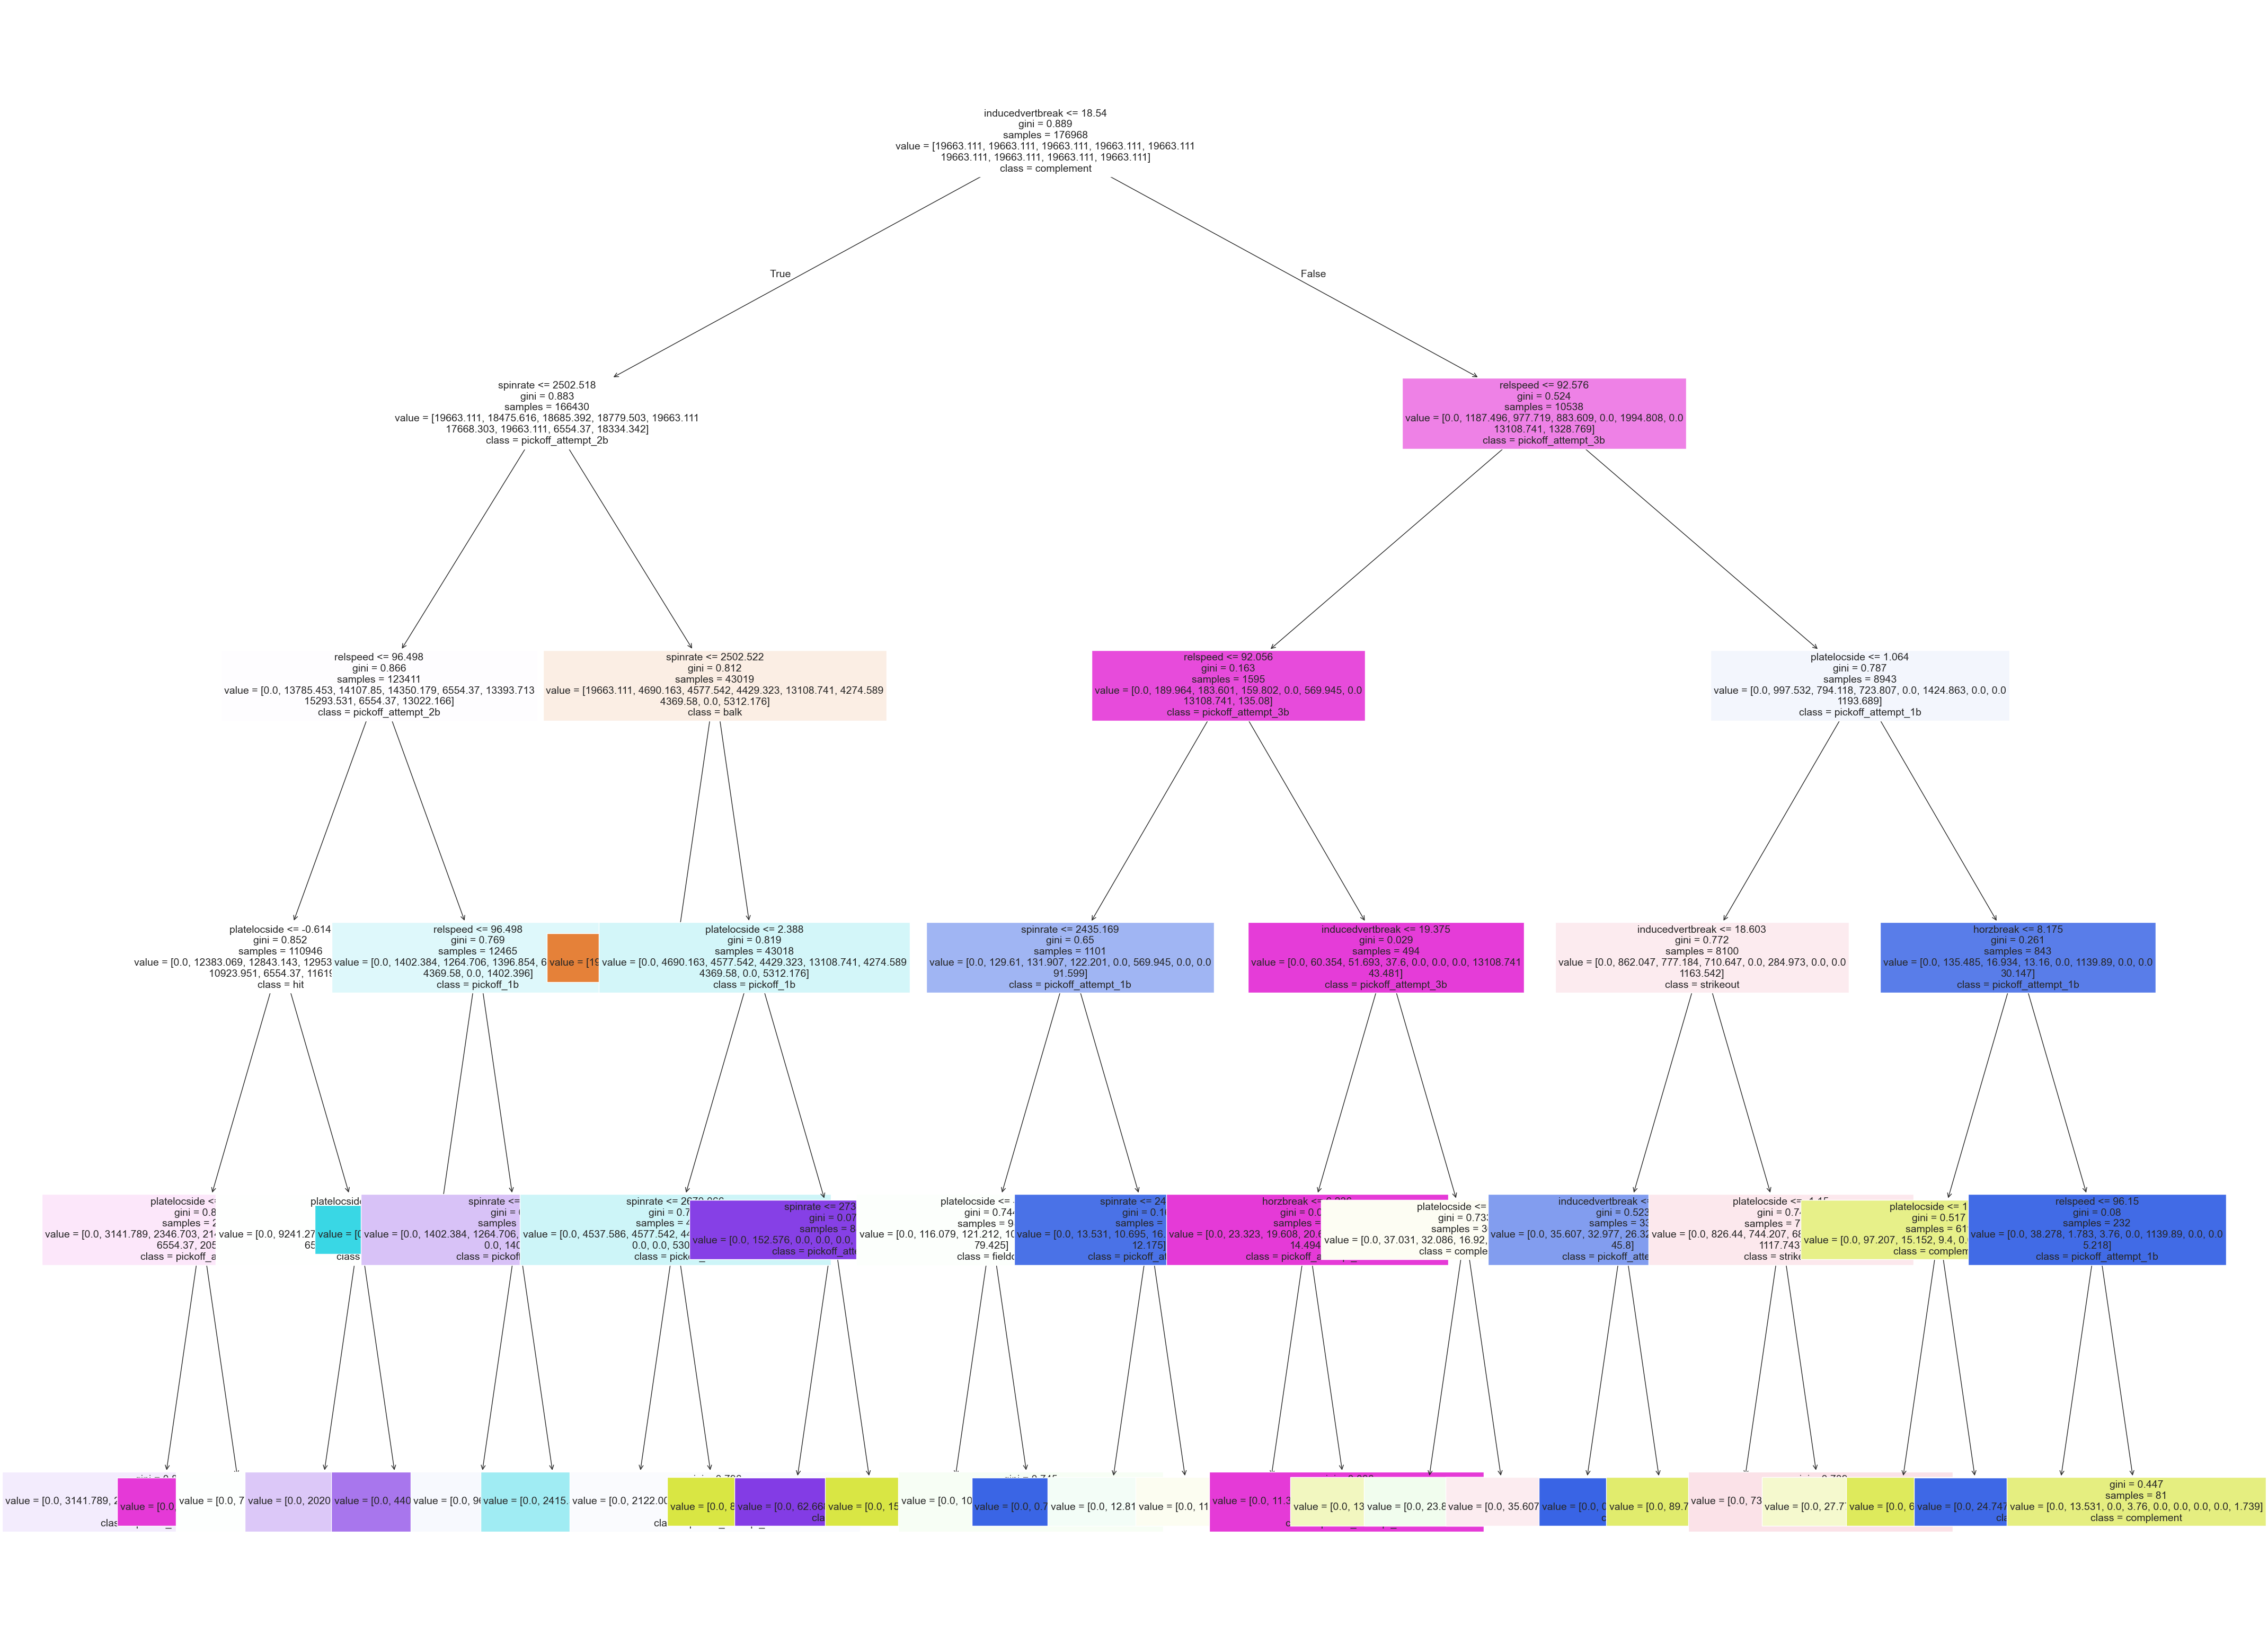

In [23]:
filtered_df = high_pressure_df

# Define the features (pitch characteristics) and target (eventtype)
features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']
target = 'eventtype'

X = filtered_df[features]
y = filtered_df[target]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the class names to a list
class_names = list(clf.classes_)

# Set a much larger figure size and increase font size
plt.figure(figsize=(50, 40))  # Even larger figure
plot_tree(clf, feature_names=features, class_names=class_names, filled=True, fontsize=14)  # Increase font size to 14

plt.show()



In [24]:
class_names

['balk',
 'complement',
 'fieldout',
 'hit',
 'pickoff_1b',
 'pickoff_attempt_1b',
 'pickoff_attempt_2b',
 'pickoff_attempt_3b',
 'strikeout']

## Explore What the Most Common Pitches are in a 2-Count Strike

## Just Looking at strikeouts and fieldouts - Do we find any significant differences in their appearances based on our chosen characteristics? 

In [25]:
high_pressure_df['eventtype'].value_counts()

eventtype
complement            157788
strikeout              48383
fieldout               31501
hit                    15023
pickoff_attempt_1b        93
pickoff_attempt_2b        11
pickoff_attempt_3b         5
pickoff_1b                 4
pickoff_3b                 2
balk                       1
pickoff_2b                 1
Name: count, dtype: int64

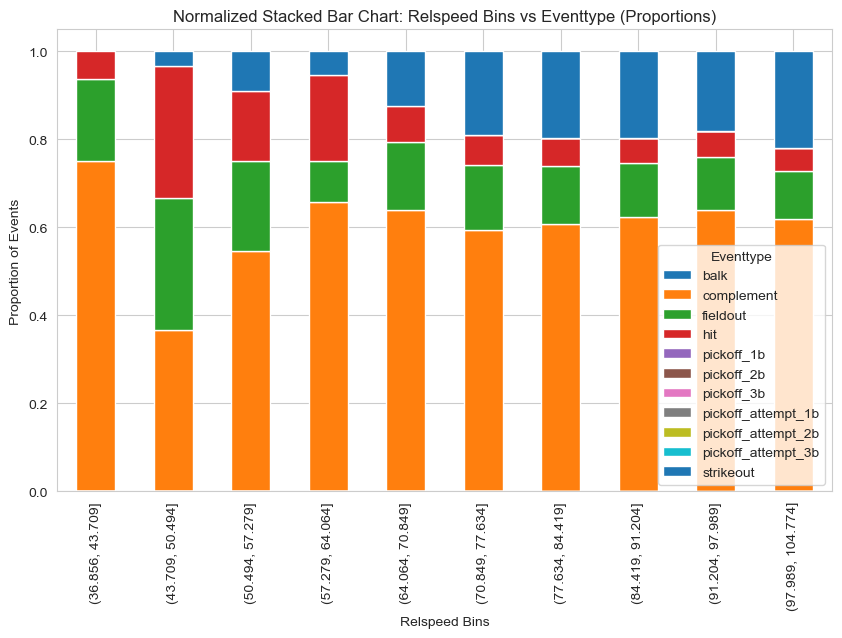

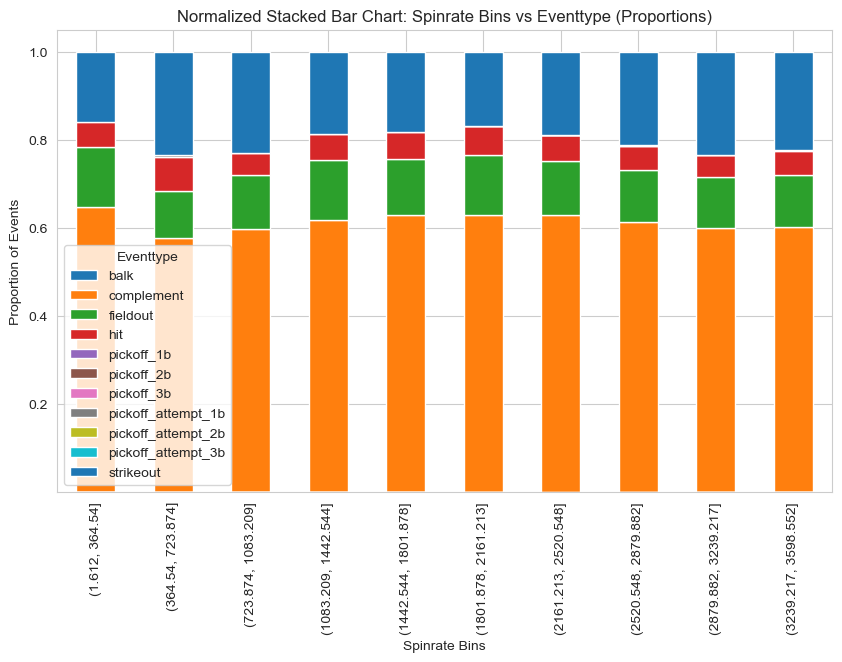

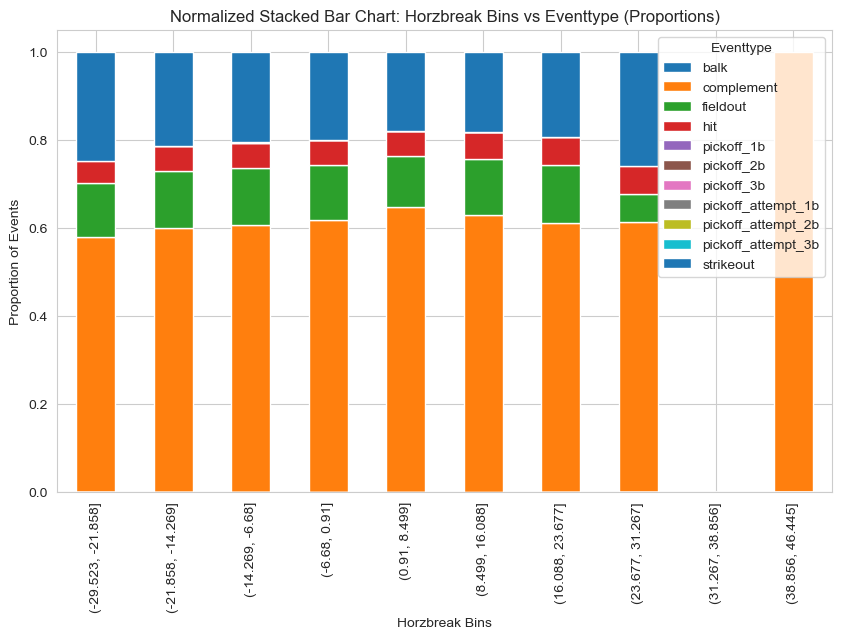

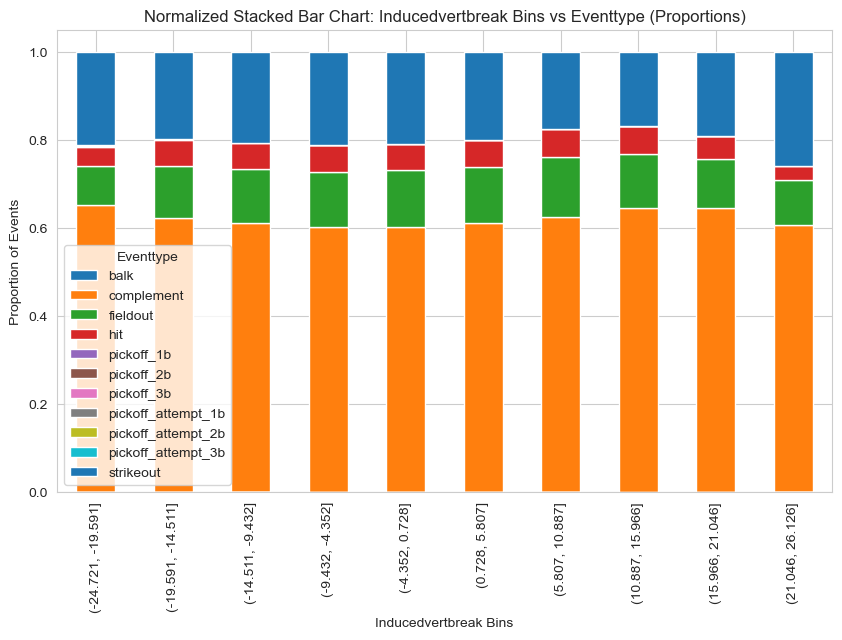

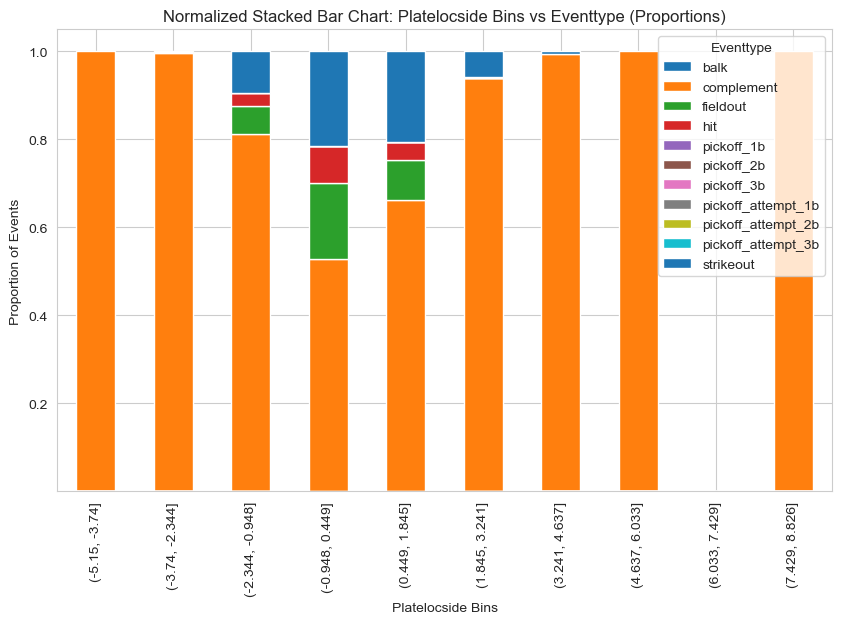

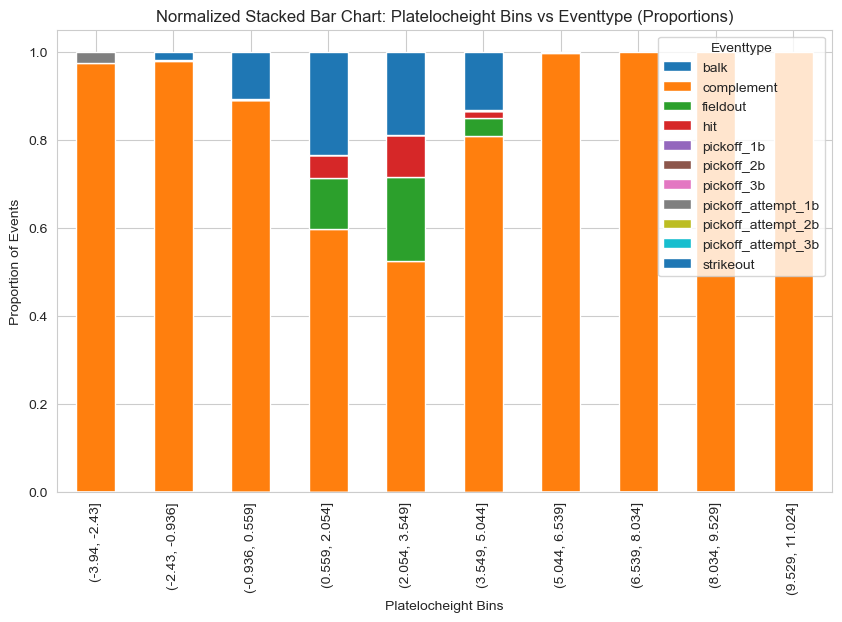

In [26]:
characteristics = [ 'relspeed', 'spinrate', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

for characteristic in characteristics:
    plot_normalized_stacked_bar(high_pressure_df, characteristic, 'eventtype', bins=10)

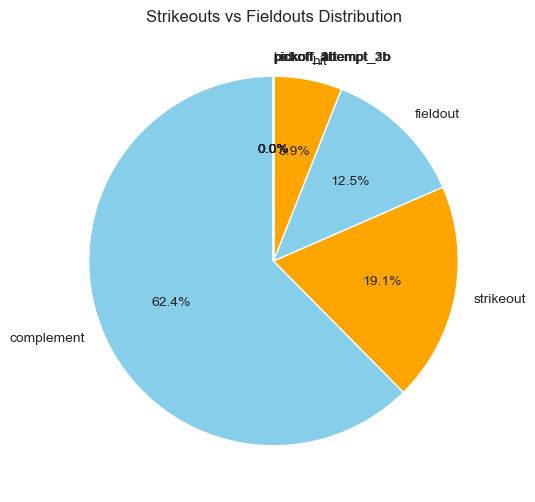

In [27]:
# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['eventtype'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(eventtype_counts, labels=eventtype_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Strikeouts vs Fieldouts Distribution')
plt.show()

## Trying to Fit a Logistic Regression Model to our data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm

# Assuming your DataFrame is df and 'eventtype' is your target variable

# Convert eventtype to a binary variable (1 for 'strikeout', 0 for 'fieldout')
high_pressure_df['eventtype_binary'] = high_pressure_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Select the characteristics
characteristics = [#'relspeed',
    'spinrate', 'horzbreak', #'inducedvertbreak'
    'platelocside', 'platelocheight']

# Check for missing values and fill/drop if necessary
df = high_pressure_df.dropna(subset=characteristics)

# Split data into features (X) and target (y)
X = df[characteristics]
y = df['eventtype_binary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     61378
           1       0.00      0.00      0.00     14466

    accuracy                           0.81     75844
   macro avg       0.40      0.50      0.45     75844
weighted avg       0.65      0.81      0.72     75844

ROC AUC Score: 0.5349255708801


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

## Our Models perform poorly given just our pitch characteristics and Strikeout/Fieldout, this could suggest a bunch of things, some that I can think of: 
- Our pitch characteristics may just have relationships that cannot be captured with logistic regression
- Fieldouts/Strikeouts are just too similar and there's no real difference in what pitches result in any specific type of out
- Our data just isn't specific enough to look into a question that looks at Strike**outs** and Field**outs**

## Moving Forward - Trying to Get more Narrow

In [30]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & ((baseball_df['balls'] == 0) | (baseball_df['balls'] == 1))].copy()

In [31]:
high_pressure_df['eventtype'].value_counts()

eventtype
ball                          125786
foul                           72065
strikeout                      67108
field_out                      40706
single                         14678
blocked_ball                   13336
double                          3896
force_out                       2358
home_run                        2185
grounded_into_double_play       1893
hit_by_pitch                    1531
wild_pitch                      1362
stolen_base_2b                  1022
field_error                      733
sac_fly                          576
triple                           353
fielders_choice                  228
caught_stealing_2b               212
double_play                      209
fielders_choice_out              150
pickoff_attempt_1b               114
stolen_base_3b                   109
passed_ball                       89
sac_bunt                          82
defensive_indiff                  61
strikeout_double_play             55
catcher_interf              

In [32]:
# Ensure 'eventtype' is a string, in case of mixed types
high_pressure_df['eventtype'] = high_pressure_df['eventtype'].astype(str)

fieldout_types = ['field_out', 'force_out', 'grounded_into_double_play', 'fielders_choice_out', 'fielders_choice', 'double_play', 'sac_fly', 'sac_bunt', 'sac_fly_double_play', 'triple_play']

strikeout_types = ['strikeout', 'strikeout_double_play']

high_pressure_df['outcome'] = high_pressure_df['eventtype'].apply(
    lambda x: 'Strikeout' if x in strikeout_types 
              else 'Fieldout' if x in fieldout_types 
              else 'Other'
)


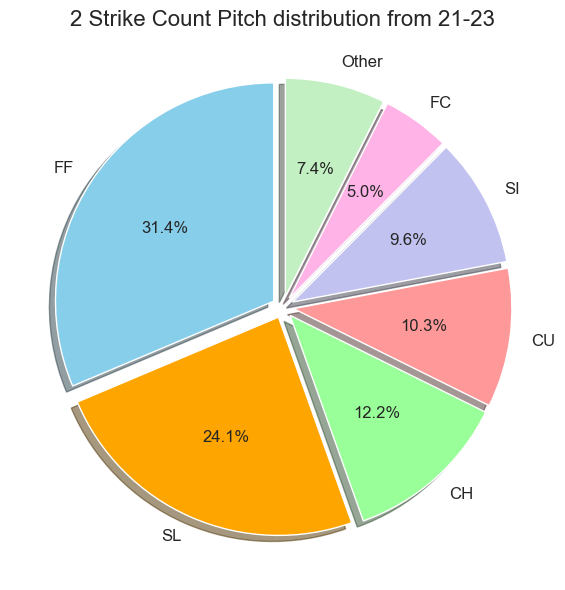

In [33]:
import matplotlib.pyplot as plt

# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['pitchname'].value_counts()

# Define the threshold for grouping less frequent categories into "Other"
threshold = 0.05 * eventtype_counts.sum()  # 5% threshold

# Group small categories into "Other"
small_categories = eventtype_counts[eventtype_counts < threshold]
eventtype_counts_aggregated = eventtype_counts[eventtype_counts >= threshold]
eventtype_counts_aggregated['Other'] = small_categories.sum()

# Plot pie chart with improvements
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'orange', '#99ff99', '#ff9999', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb380']  # Adjusted color palette
explode = [0.05] * len(eventtype_counts_aggregated)  # Slightly explode each slice

# Create pie chart
plt.pie(eventtype_counts_aggregated, labels=eventtype_counts_aggregated.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('2 Strike Count Pitch distribution from 21-23', fontsize=16)
plt.tight_layout()
plt.show()


In [34]:
high_pressure_df = high_pressure_df[high_pressure_df['eventtype'].isin(['field_out', 'ball'])]
high_pressure_df = high_pressure_df[high_pressure_df['pitchname'].isin(['FF'])]

In [35]:
high_pressure_df['eventtype'].unique()

array(['ball', 'field_out'], dtype=object)

In [36]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming your dataframe is high_pressure_df and these are the columns to scale
columns_to_scale = [ 'relspeed', 'spinrate', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

# Initialize the MinMaxScaler with the feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the selected columns
scaled_values = scaler.fit_transform(high_pressure_df[columns_to_scale])

# Create a copy of the original dataframe
scaled_df = high_pressure_df.copy()

# Replace the original columns with the scaled values
scaled_df[columns_to_scale] = scaled_values

# Display the first few rows of the new dataframe with scaled values
scaled_df.head()


,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,event_category,outcome
37,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,3,2.0,0,0.0,2.0,...,0.340302,-0.132044,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,Pitch Count Event,Other
159,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,39,3,5.0,1,0.0,2.0,...,0.223277,-0.110445,115,Colorado Rockies,121,New York Mets,19,Coors Field,Fieldout,Fieldout
173,2021/04/18/chamlb-bosmlb-1,2021-04-18 13:10:00,2021-04-18,13:10:00,14,4,3.0,0,1.0,2.0,...,0.007069,-0.267789,111,Boston Red Sox,145,Chicago White Sox,3,Fenway Park,Fieldout,Fieldout
231,2021/04/21/pitmlb-detmlb-2,2021-04-21 17:40:00,2021-04-21,17:40:00,27,4,4.0,1,0.0,2.0,...,-0.217097,0.161181,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park,Pitch Count Event,Other
262,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,5,3,1.0,1,0.0,2.0,...,0.312884,0.085014,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,Pitch Count Event,Other


## Just for fun, making pair plots to look at the expression ranges for each pitch characteristic for only two eventtypes, (fieldout and ball) 
- it seems like they both have  a similar distribution - ball just overall has way more variance and that makes sense because outs are going to be pretty precise 

/Users/nathanglen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


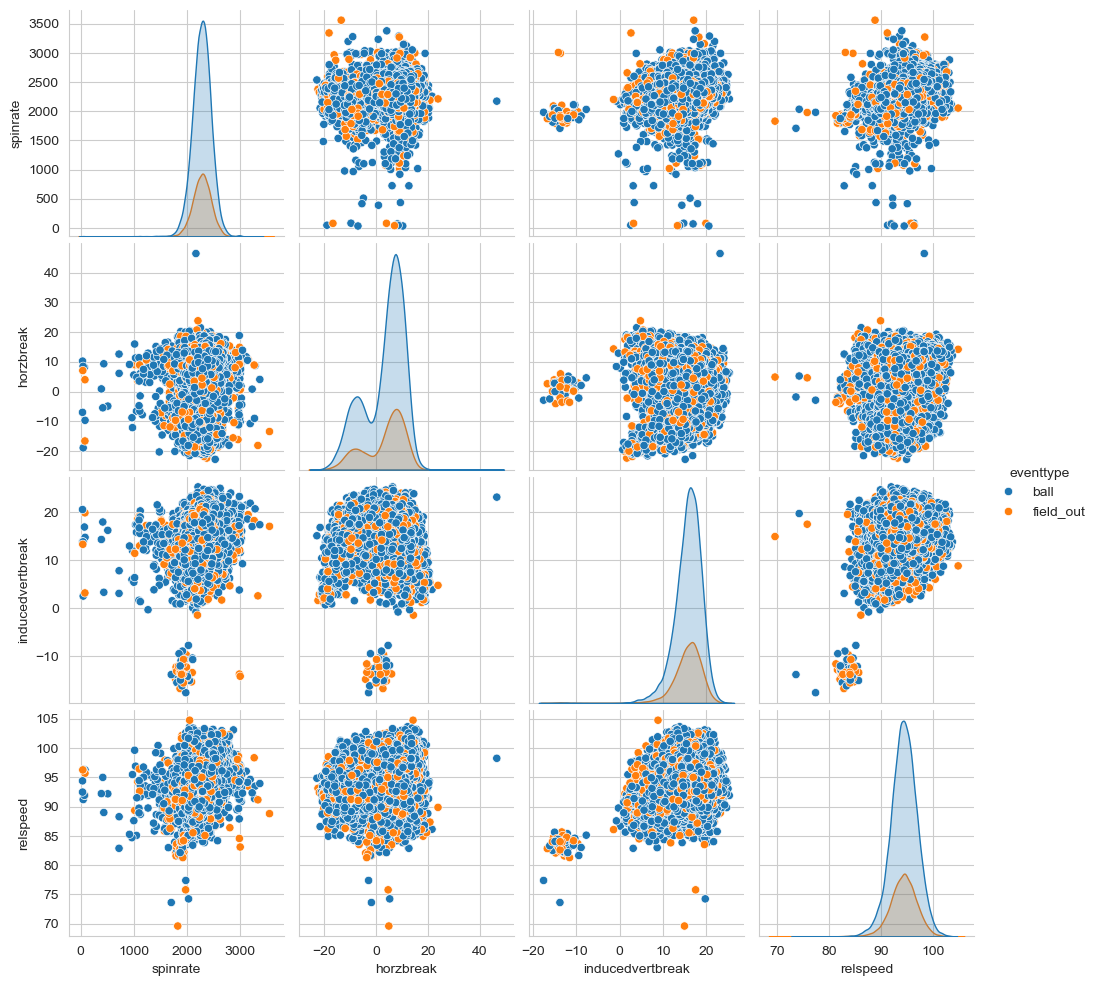

In [37]:
sns.pairplot(high_pressure_df, hue='eventtype', vars=['spinrate', 'horzbreak', 'inducedvertbreak', 'relspeed'])